<a href="https://colab.research.google.com/github/MugdhaYada/my_projects-IDS/blob/main/HW4/Problem1_r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#R-magic

%load_ext rpy2.ipython

In [2]:
#importing the data from Git

%%R

library(readr)
adult_trainingDF <- read_csv("https://raw.githubusercontent.com/MugdhaYada/my_projects-IDS/main/HW4/adult_training.csv")

adult_trainingDF

Rows: 14797 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): workclass, marital_status, occupation, sex, income
dbl (4): age, education, capital-gain, capital-loss

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
# A tibble: 14,797 × 9
     age workclass      education marital_status occupation sex   `capital-gain`
   <dbl> <chr>              <dbl> <chr>          <chr>      <chr>          <dbl>
 1    50 Self-emp-not-…        13 Married-civ-s… Exec-mana… Male               0
 2    38 Private                9 Divorced       Handlers-… Male               0
 3    49 Private                5 Married-spous… Other-ser… Fema…              0
 4    52 Self-emp-not-…         9 Married-civ-s… Exec-mana… Male               0
 5    31 Private               14 Never-married  Prof-spec… Fema…          14084
 6    40 Private        

I have given the path of my git repo where I have stored the data in the form of CSV.

In [3]:
#Cross tabulation for 'workclass' and 'sex'
%%R


r_crosstab <- table(adult_trainingDF$sex, adult_trainingDF$workclass)

ftable(r_crosstab)

           ? Federal-gov Local-gov Never-worked Private Self-emp-inc Self-emp-not-inc State-gov Without-pay
                                                                                                           
Female   377         149       377            1    3574           54              178       201           1
Male     452         305       592            4    6707          444              992       385           4


Created the contingency table in R using 'crosstab' keyword for 'Work class' & 'Sex'.

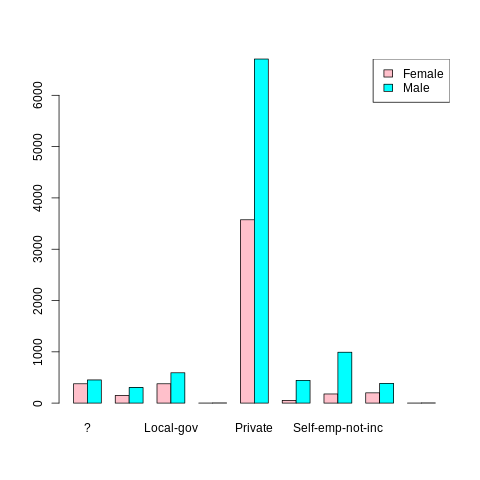

In [25]:
#Bar plot of the contigency table of 'workclass' and 'sex'
%%R
colors <- c("pink", "cyan")
barplot(r_crosstab, col = colors, beside = TRUE)
legend("topright", legend = c("Female", "Male"), fill = colors)

Above is the Bar plotting of the contigency table of 'workclass' and 'sex'

In [5]:
#Cross tabulation for 'sex' and 'marital_status'

%%R

a_crosstab <- table(adult_trainingDF$sex, adult_trainingDF$marital_status)

ftable(a_crosstab)

        Divorced Married-AF-spouse Married-civ-spouse Married-spouse-absent Never-married Separated Widowed
                                                                                                           
Female      1219                 7                761                    95          2160       290     380
Male         795                 4               6010                   104          2717       182      73


Created the contingency table in R using 'crosstab' keyword for 'sex' & 'marital_status'.

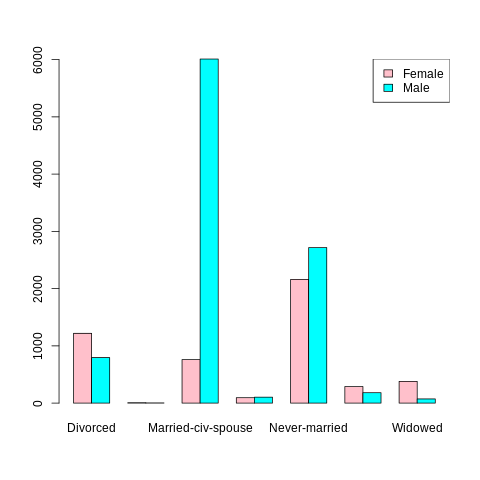

In [26]:
#Bar plotting of contingency table of 'sex' and 'marital_status'

%%R

colors <- c("pink", "cyan")

barplot(a_crosstab, col = colors, beside = TRUE)
legend("topright", legend = c("Female", "Male"), fill = colors)

Above is the Bar plot of contingency table of 'sex' and 'marital_status'.

In [7]:
#created a new dataframe for adults over 40

%%R
adultover40DF<- subset(adult_trainingDF,age>40)
adultover40DF


# A tibble: 6,144 × 9
     age workclass      education marital_status occupation sex   `capital-gain`
   <dbl> <chr>              <dbl> <chr>          <chr>      <chr>          <dbl>
 1    50 Self-emp-not-…        13 Married-civ-s… Exec-mana… Male               0
 2    49 Private                5 Married-spous… Other-ser… Fema…              0
 3    52 Self-emp-not-…         9 Married-civ-s… Exec-mana… Male               0
 4    43 Private                7 Married-civ-s… Transport… Male               0
 5    54 ?                     10 Married-civ-s… ?          Male               0
 6    44 Private               14 Divorced       Exec-mana… Fema…              0
 7    50 Federal-gov           13 Divorced       Exec-mana… Male               0
 8    47 Self-emp-inc           9 Divorced       Exec-mana… Male               0
 9    43 Private               10 Married-civ-s… Tech-supp… Male               0
10    53 Private                9 Married-civ-s… Adm-cleri… Fema…              0
# … wi

Created a new dataframe 'adultOver40DF' for the adults above 40.

In [8]:
#cross tabulation of 'sex' and ''marital_status' for 'adultOver40DF'

%%R

b_crosstab <- table(adultover40DF$sex, adultover40DF$marital_status)

ftable(b_crosstab)

        Divorced Married-civ-spouse Married-spouse-absent Never-married Separated Widowed
                                                                                         
Female       720                305                    38           256       133     354
Male         448               3383                    47           315        74      71


Recreated the contingency table for 'sex' and ''marital_status' for the new dataframe we created for adults Over 40.


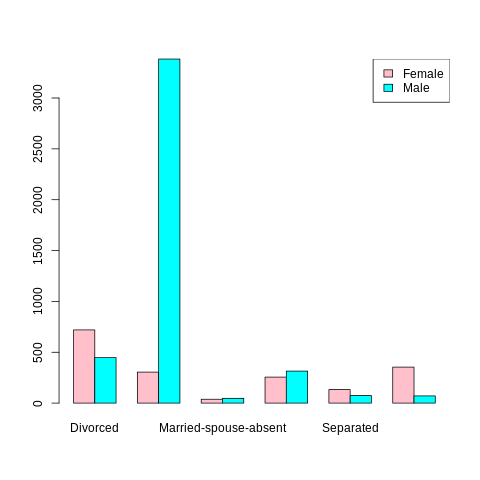

In [27]:
#Bar plot of 'sex' and 'marital_status' for 'adultOver40DF' dataframe

%%R

colors <- c("pink", "cyan")

barplot(b_crosstab, col = colors, beside = TRUE)
legend("topright", legend = c("Female", "Male"), fill = colors)

Above is the bar plot of 'sex' and 'marital_status' of 'adultOver40DF' dataframe.

In [19]:
# Determine the three sigma rule first for the education attribute
%%R

three_sigma_rule <- (adult_trainingDF$education < -3 | 
                     adult_trainingDF$education > 3 )


# how many outliers are there?
cat ("There are", sum(three_sigma_rule), "outliers \n\n")


# The condition given as input to which() states that we want
# all records whose scaled age values are less than −3 or greater than 3. 

# The which() command returns the row indices of all such records. 


cat("The scaled age values that are upper bound outliers: \n\n")
adult_trainingDF$education[which(three_sigma_rule)]


cat("\n\nThe scaled age values that are lower bound outliers: \n\n")
adult_trainingDF$education[which(!three_sigma_rule)]

There are 14528 outliers 

The scaled age values that are upper bound outliers: 



The scaled age values that are lower bound outliers: 

  [1] 2 1 2 3 2 3 3 2 2 3 3 2 3 3 2 3 3 2 3 2 3 1 1 3 3 2 3 3 1 3 3 2 1 2 3 3 3
 [38] 3 3 2 3 3 3 3 2 2 2 2 3 1 1 2 2 1 1 1 3 2 2 1 3 2 3 3 2 3 3 3 3 3 3 3 3 2
 [75] 3 3 3 3 3 3 3 3 3 1 2 3 3 3 1 2 3 3 2 3 3 2 3 2 2 3 2 3 3 3 2 2 2 3 3 3 3
[112] 2 2 3 3 2 3 2 3 2 2 3 3 3 3 2 2 2 2 3 2 1 3 2 3 3 2 3 3 3 3 3 3 2 3 3 3 3
[149] 2 2 3 2 2 2 2 3 3 2 3 3 3 3 3 2 3 3 3 1 3 2 1 3 1 3 3 3 1 3 3 2 3 3 3 3 3
[186] 3 3 3 3 3 1 2 1 1 3 1 3 3 3 2 3 1 3 2 3 2 3 2 3 2 3 3 3 3 3 3 3 3 3 2 3 3
[223] 2 2 2 2 3 3 3 2 3 2 3 3 3 3 2 3 2 2 2 3 2 2 2 2 3 3 3 3 3 3 2 2 2 3 2 2 2
[260] 3 2 2 3 2 1 3 3 2 3


Determining the outliers of the 'education' field by using the three sigma rule.

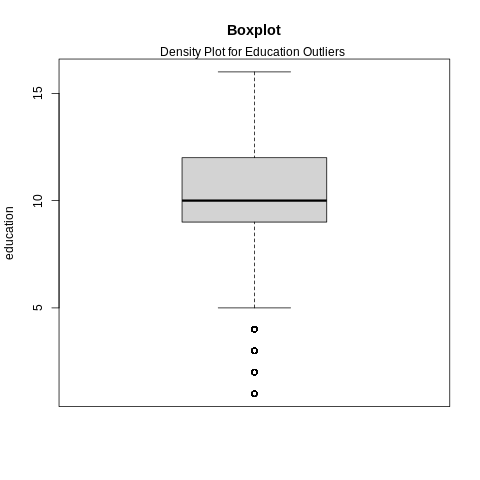

In [11]:
#Box plot for determining outliers
%%R
boxplot(adult_trainingDF$education,
  ylab = "education",
  main = "Boxplot"
)
mtext(paste("Density Plot for Education Outliers", paste(collapse = ", ")))


Above is the box plot for finding the outliers of education field.
By observing the above box plot we can say that, The points below the min value are the outliers

In [12]:
#Standardizing zero mean

%%R
adult_trainingDF$age <- scale(x = adult_trainingDF$age)

summary(adult_trainingDF$age)

       V1         
 Min.   :-1.5855  
 1st Qu.:-0.7813  
 Median :-0.1234  
 Mean   : 0.0000  
 3rd Qu.: 0.6808  
 Max.   : 3.7512  


Standardizing the 'age' field by z-score

In [13]:
#Min-max scaling of 'age' field

%%R
norm_minmax <- function(x){
                           (x- min(x)) /(max(x)-min(x))
                          }

adult_trainingDF$scaled_age <- norm_minmax(adult_trainingDF$age)

summary(adult_trainingDF$scaled_age)

       V1        
 Min.   :0.0000  
 1st Qu.:0.1507  
 Median :0.2740  
 Mean   :0.2971  
 3rd Qu.:0.4247  
 Max.   :1.0000  


In [14]:
# Determine the outliers of the age attribute using the three sigma rule.
%%R

three_sigma_rule <- (adult_trainingDF$age < -3 | 
                     adult_trainingDF$age > 3 )


# how many outliers are there?
cat ("There are", sum(three_sigma_rule), "outliers \n\n")

# The condition given as input to which() states that we want
# all records whose scaled age values are less than −3 or greater than 3. 

# The which() command returns the row indices of all such records. 

cat("The age values that are outliers: \n\n")
adult_trainingDF$age[which(three_sigma_rule)]


cat("\n\nThe age values that are NOT outliers: \n\n")
adult_trainingDF$age[which(!three_sigma_rule)]

There are 60 outliers 

The age values that are outliers: 



The age values that are NOT outliers: 

    [1]  0.82700980 -0.05025535  0.75390437  0.97322066 -0.56199336  0.09595551
    [7] -0.05025535  0.31527180  1.11943152  0.02285008 -0.63509878 -1.29304765
   [13] -1.43925851 -0.56199336 -0.56199336 -1.07373136  0.38837722 -1.00062593
   [19] -1.51236393  0.82700980  0.60769351  0.31527180 -0.26957164 -0.63509878
   [25] -0.70820421 -0.78130964  1.04632609 -1.00062593 -0.56199336 -1.14683679
   [31]  2.94706725  0.09595551 -1.51236393  0.97322066  1.48495866  0.38837722
   [37]  0.75390437  0.31527180 -0.48888793  2.72775096  0.38837722  0.60769351
   [43] -1.58546936 -0.63509878 -0.56199336  0.24216637 -0.19646621  1.04632609
   [49]  1.26564237  0.75390437 -1.21994222  0.09595551 -0.63509878 -0.70820421
   [55] -1.43925851 -1.36615308 -0.56199336 -0.78130964 -1.07373136 -0.12336078
   [61] -0.05025535 -0.85441507  0.75390437  1.63116952 -0.85441507 -1.43925851
   [67]  0.4614826

Determined the outliers of the 'age' field using the three sigma rule.
From the result we can infer that there are 60 outliers in the 'age' field.

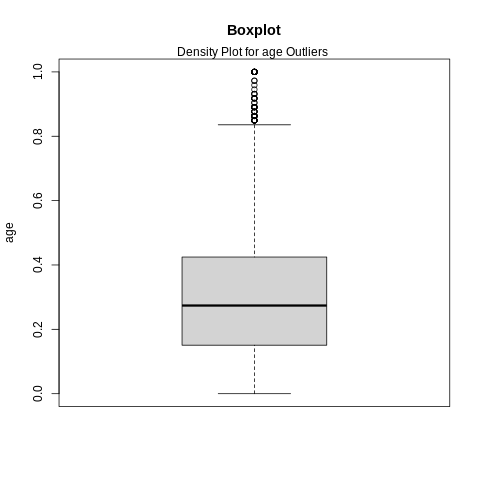

In [15]:
#Box plot of the age field to determine the outliers
%%R

boxplot(adult_trainingDF$scaled_age,
  ylab = "age",
  main = "Boxplot"
)
mtext(paste("Density Plot for age Outliers", paste(collapse = ", ")))

Above is the box plot of the 'age' field to determine the outliers.
By observing the box plot we can conclude that, all the points that are above the max value are outliers and I can say that 90 is the extreme outlier.

In [16]:
#Creating a new data frame for adults who are 80 or above 80

%%R

adultAtleast80DF<- subset(adultover40DF,age>=80)
adultAtleast80DF

# A tibble: 60 × 9
     age workclass      education marital_status occupation sex   `capital-gain`
   <dbl> <chr>              <dbl> <chr>          <chr>      <chr>          <dbl>
 1    90 Private                9 Never-married  Other-ser… Male               0
 2    80 ?                      9 Widowed        ?          Male               0
 3    90 Private                9 Never-married  Other-ser… Fema…              0
 4    88 Self-emp-not-…        15 Married-civ-s… Prof-spec… Male               0
 5    90 Private               13 Married-civ-s… Exec-mana… Male               0
 6    90 Private               10 Never-married  Other-ser… Male               0
 7    82 ?                      4 Widowed        ?          Male               0
 8    90 Private                5 Never-married  Adm-cleri… Fema…              0
 9    80 Private               14 Widowed        Prof-spec… Fema…              0
10    90 Local-gov             14 Married-civ-s… Exec-mana… Male           20051
# … with 

Created the dataframe for the adults whose age is 80 or above.

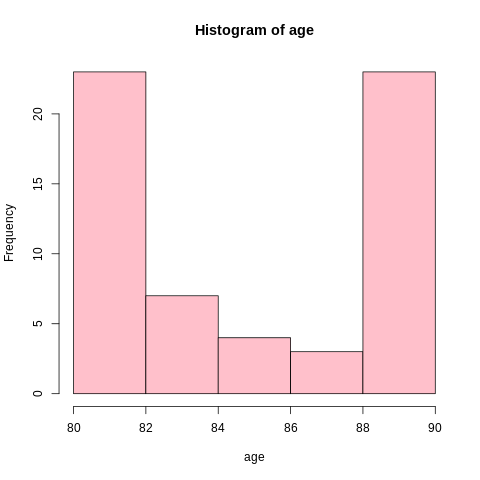

In [24]:
#Histogram of adults whose age is >=80
%%R
hist(adultAtleast80DF$age, xlab = "age", 
       main = "Histogram of age", col="pink")


Above is the histogram of the adults whose age is 80 or above.
We observe that the adults between age 88-90 are higher in the training.

**Summary**:
*  By observing the bar plot of contingency table of ‘workclass’ and ‘sex’ that we created, we can assume that there are more number of males in private sector compared to women. 
*  By observing the bar plot of contingency table of ‘sex’ and ‘marital_status’ that we created in Python and R, we can assume that the ratio of males in higher in the marital status of ‘Married-civ-spouse’ compared to women. 
*   We can tell that there are outliers for the ‘education’ attribute after calculating the outliers, from R we can conclude that there are 14528 outliers for the field education.
* We can tell that there are outliers for the ‘age’ attribute after calculating the outliers, from R we can conclude that there are 60 outliers for the field age and the most extreme outlier is present at age.
* From the histogram we can infer that the there are more adults between age 88-90.